# Detection of outliers in the file

In [128]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Reading the data
df = pd.read_csv('advertisement.csv', header=0, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [130]:
# fill missing values
df = df.interpolate(method="linear", limit_direction='forward')
df.skew(numeric_only = True)

TV            3.664894
radio        10.333252
newspaper     2.258230
sales        14.139451
dtype: float64

<Axes: >

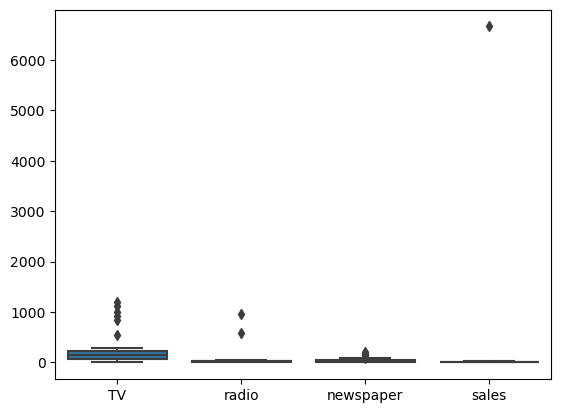

In [131]:
sns.boxplot(data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x2046275c910>,
 'caps': [<matplotlib.lines.Line2D at 0x2046275e110>,
 'boxes': [<matplotlib.lines.Line2D at 0x2046274fd50>],
 'medians': [<matplotlib.lines.Line2D at 0x2046275f710>],
 'fliers': [<matplotlib.lines.Line2D at 0x20462770110>],
 'means': []}

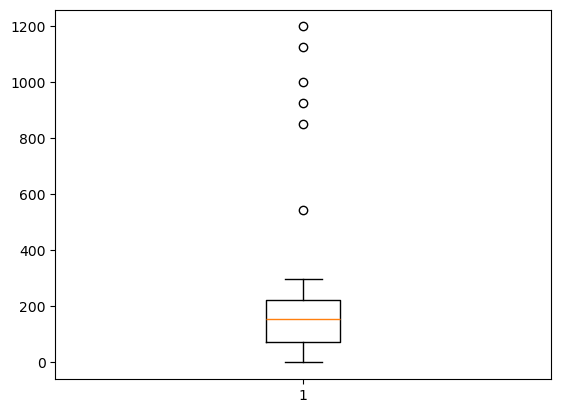

In [132]:
plt.boxplot(df['TV']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x204627c2350>,
 'caps': [<matplotlib.lines.Line2D at 0x204627c3b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x204627c1710>],
 'medians': [<matplotlib.lines.Line2D at 0x204627ccf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x204627cd9d0>],
 'means': []}

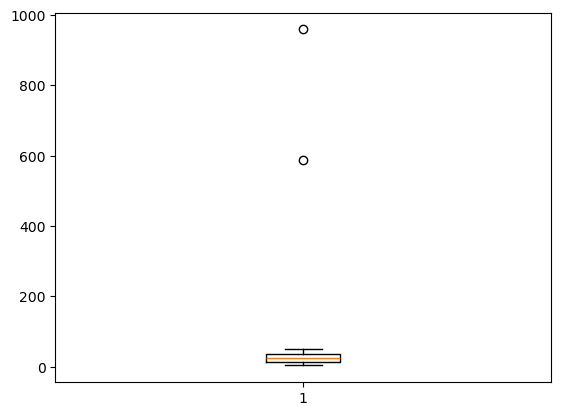

In [133]:
plt.boxplot(df['radio']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x20462828c90>,
 'caps': [<matplotlib.lines.Line2D at 0x2046282a490>,
 'boxes': [<matplotlib.lines.Line2D at 0x20462828210>],
 'medians': [<matplotlib.lines.Line2D at 0x2046282bb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20462830610>],
 'means': []}

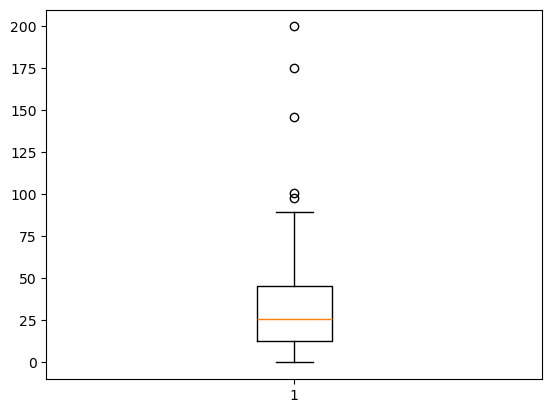

In [134]:
plt.boxplot(df['newspaper']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x20462892490>,
 'caps': [<matplotlib.lines.Line2D at 0x20462893d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20462891a10>],
 'medians': [<matplotlib.lines.Line2D at 0x2046289d2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2046289ddd0>],
 'means': []}

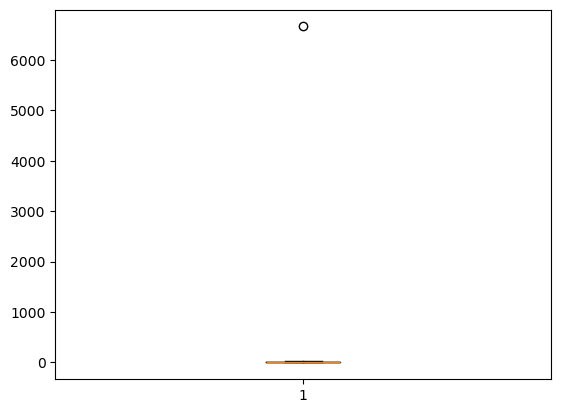

In [135]:
plt.boxplot(df['sales']) 

In [136]:
# fix outliers
for col in df.columns:
    # iqr and bounds calculation
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5*iqr
    high_bound = q3 + 1.5*iqr

    # cap outliers
    df[col] = np.where(df[col] < low_bound, low_bound, df[col])
    df[col] = np.where(df[col] > high_bound, high_bound, df[col])

    #rounding
    df[col]=df[col].round(1)

In [137]:
df.skew(numeric_only=True)

TV           0.516916
radio        0.449544
newspaper    0.870329
sales        0.358778
dtype: float64

<Axes: >

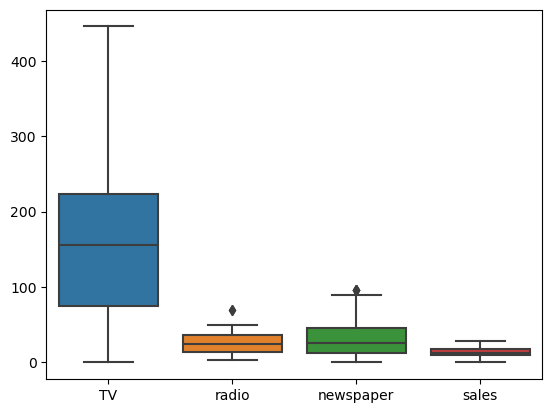

In [138]:
sns.boxplot(data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x20462ad5710>,
 'caps': [<matplotlib.lines.Line2D at 0x20462ad6e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x20462ad4b90>],
 'medians': [<matplotlib.lines.Line2D at 0x20462ae0250>],
 'fliers': [<matplotlib.lines.Line2D at 0x20462ae0dd0>],
 'means': []}

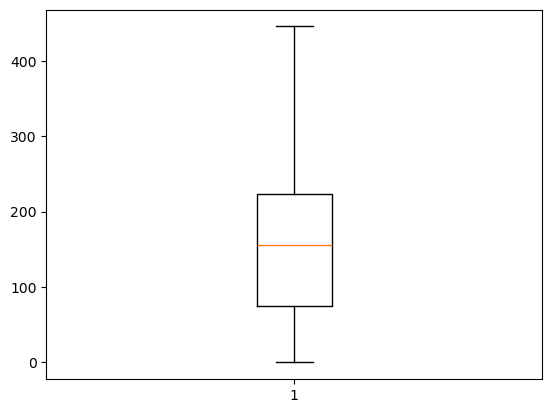

In [139]:
plt.boxplot(df['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20462b36c90>,
 'caps': [<matplotlib.lines.Line2D at 0x20462b44550>,
 'boxes': [<matplotlib.lines.Line2D at 0x20462b36250>],
 'medians': [<matplotlib.lines.Line2D at 0x20462b45a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20462b46450>],
 'means': []}

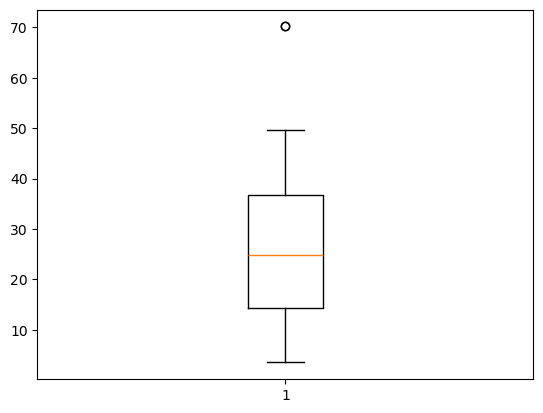

In [140]:
plt.boxplot(df['radio']) 

{'whiskers': [<matplotlib.lines.Line2D at 0x20462b92b50>,
 'caps': [<matplotlib.lines.Line2D at 0x20462b9c090>,
 'boxes': [<matplotlib.lines.Line2D at 0x20462b92150>],
 'medians': [<matplotlib.lines.Line2D at 0x20462b9d610>],
 'fliers': [<matplotlib.lines.Line2D at 0x20462b9e150>],
 'means': []}

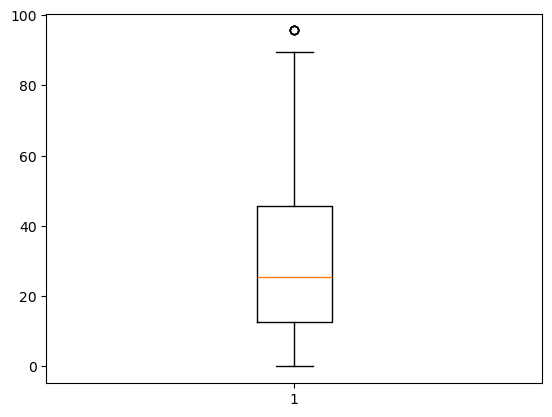

In [141]:
plt.boxplot(df['newspaper'])

{'whiskers': [<matplotlib.lines.Line2D at 0x204628c53d0>,
 'caps': [<matplotlib.lines.Line2D at 0x204628c6910>,
 'boxes': [<matplotlib.lines.Line2D at 0x204628c5110>],
 'medians': [<matplotlib.lines.Line2D at 0x204628c7d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x204628d0850>],
 'means': []}

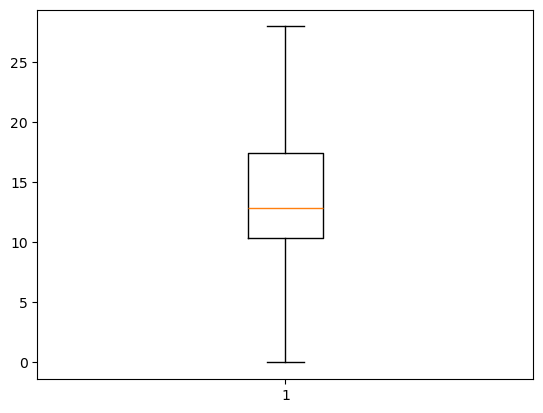

In [142]:
plt.boxplot(df['sales'])

In [143]:
df.to_csv(r'treated_adv.csv', index=False)